In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt
import joblib


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv("data/Toddler Autism dataset July 2018.csv")

In [3]:
#Clean and Prepare Data
features = [f"A{i}" for i in range(1, 11)]
X = df[features]
y = df["Class/ASD Traits "].str.strip().map({"Yes": 1, "No": 0})  # Normalize labels

In [4]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
#  Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.99


In [7]:
#  Save Model
joblib.dump(model, "rf_model.pkl")

['rf_model.pkl']

In [8]:
# SHAP Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

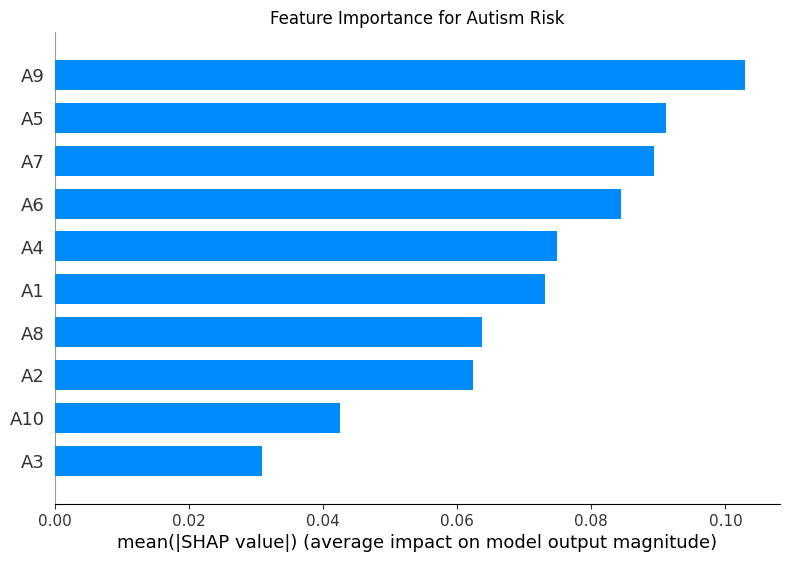

In [9]:
# . Plot SHAP Summary
shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=False)
plt.title("Feature Importance for Autism Risk")
plt.savefig("shap_summary.png")

In [10]:
def predict_behavioral_score(responses):
    model = joblib.load("rf_model.pkl")
    input_df = pd.DataFrame([responses], columns=[f"A{i}" for i in range(1, 11)])
    prob = model.predict_proba(input_df)[0][1]
    label = "Autistic Traits Detected" if prob > 0.5 else "No Traits Detected"
    return label, round(prob, 2)

In [14]:
test_input = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # replace with real user input
label, score = predict_behavioral_score(test_input)
print(f"Prediction: {label}, Risk Score: {score}")


Prediction: No Traits Detected, Risk Score: 0.0
